In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image

In [11]:
# Konfigurasi Dataset
dataset_dir = 'batik_jogja'
batch_size = 32
img_size = (224, 224)
EPOCHS = 100

In [12]:
# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)

class_names = dataset.class_names
print("Kelas ditemukan:", class_names)

Found 1350 files belonging to 6 classes.
Using 1080 files for training.
Found 1350 files belonging to 6 classes.
Using 270 files for validation.
Kelas ditemukan: ['batik_ceplok', 'batik_kawung', 'batik_nitik', 'batik_parang', 'batik_sidoluhur', 'batik_truntum']


In [13]:
# Bangun Model
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=img_size + (3,),
    pooling='avg'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=img_size + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [14]:
# Training
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 870ms/step - accuracy: 0.3384 - loss: 1.6057 - val_accuracy: 0.7407 - val_loss: 0.9922
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 746ms/step - accuracy: 0.7015 - loss: 0.9472 - val_accuracy: 0.7963 - val_loss: 0.7456
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 765ms/step - accuracy: 0.7587 - loss: 0.7718 - val_accuracy: 0.8185 - val_loss: 0.6492
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 760ms/step - accuracy: 0.8197 - loss: 0.6272 - val_accuracy: 0.8259 - val_loss: 0.5999
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 691ms/step - accuracy: 0.8239 - loss: 0.5669 - val_accuracy: 0.8333 - val_loss: 0.5670
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 712ms/step - accuracy: 0.8603 - loss: 0.4950 - val_accuracy: 0.8444 - val_loss: 0.5308
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 832ms/step - accuracy: 0.8344 - loss: 0.4912 - val_accuracy: 0.8407 - val_loss: 0.5129
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 858ms/step - accuracy: 0.8723 - loss: 0.4490 - 

In [15]:
# Simpan Model
model_path = 'batik_model_jogja_final.h5'
model.save(model_path)
print(f"✅ Model disimpan sebagai '{model_path}'")

✅ Model disimpan sebagai 'batik_model_jogja_final.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

=== Classification Report ===
                 precision    recall  f1-score   support

   batik_ceplok       0.79      0.82      0.81        38
   batik_kawung       0.88      0.94      0.91        48
    batik_nitik       0.85      0.79      0.82        57
   batik_parang       1.00      0.98      0.99        43
batik_sidoluhur       0.79      0.86      0.83        36
  batik_truntum       0.98      0.94      0.96        48

       accuracy                           0.89       270
      macro avg       0.88      0.89      0.88       270
   weighted avg       0.89      0.89      0.89       270



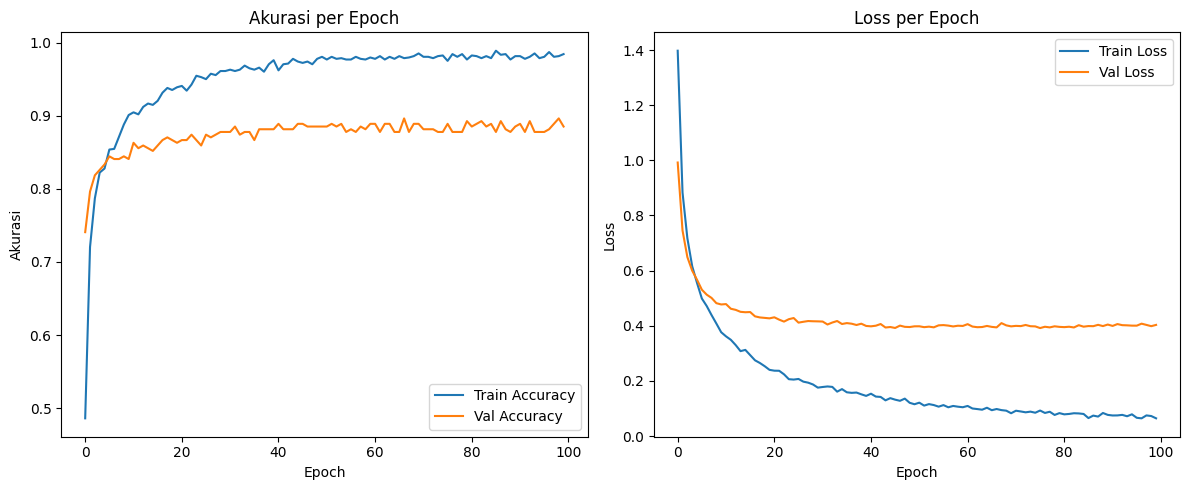

In [16]:
# Evaluasi Model: Classification Report
y_true = []
y_pred = []

for batch_images, batch_labels in val_dataset:
    preds = model.predict(batch_images)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Fungsi Prediksi Gambar Baru
def predict_image(model, img_path, class_names):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array_exp = tf.expand_dims(img_array, 0)
    img_array_preprocessed = tf.keras.applications.efficientnet.preprocess_input(img_array_exp)

    predictions = model.predict(img_array_preprocessed)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.show()

    print("\n=== HASIL KLASIFIKASI ===")
    print(f"Motif Terdeteksi: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


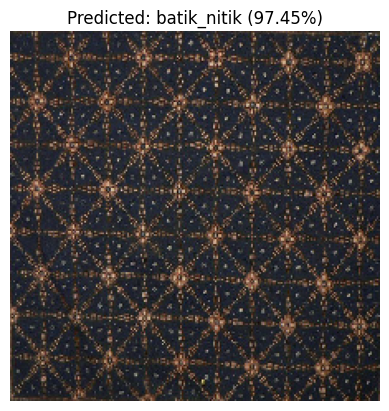


=== HASIL KLASIFIKASI ===
Motif Terdeteksi: batik_nitik
Confidence: 97.45%


In [21]:
# Contoh Prediksi
img_path = 'batik_nitik_0001.jpg'  # Ganti sesuai file yang ada
predict_image(model, img_path, class_names)